In [136]:
%config IPCompleter.greedy=True

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
dataset = pd.read_csv("./data/Position_Salaries.csv")
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [139]:
X = dataset.iloc[:, 1].values
X = X.reshape(-1,1)
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [140]:
y = dataset.iloc[:, 2].values
y = y.reshape(-1,1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [141]:
from sklearn.preprocessing import StandardScaler
norm_x = StandardScaler()
X = norm_x.fit_transform(X)

norm_y = StandardScaler()
y = norm_y.fit_transform(y)

In [142]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [143]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [153]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel="rbf")
print(y.ravel())
svr_regressor.fit(X, y.ravel())


[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [154]:
val = svr_regressor.predict(norm_x.transform([[6.5]]))
val = val.reshape(-1,1)
norm_y.inverse_transform(val)

array([[170370.0204065]])

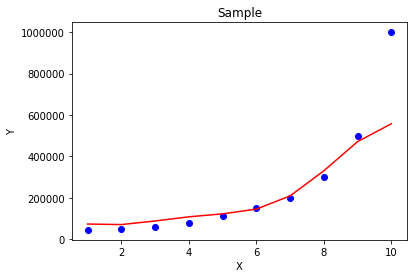

In [155]:
y_pred_poly = norm_y.inverse_transform(svr_regressor.predict(X))
plt.scatter(norm_x.inverse_transform(X), norm_y.inverse_transform(y), color = "blue")
plt.plot(norm_x.inverse_transform(X), y_pred_poly, color="red")
plt.title("Sample")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()